# Requirements

In [2]:
# Add as many imports as you need.
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Laboratory Exercise - Run Mode (8 points)

## The Mental Health Diagnosis and Treatment Monitoring Dataset
The dataset contains information on 500 individuals, focusing on mental health diagnoses, treatment plans, and outcomes. Key features include patient demographics such as age and gender, as well as specific mental health conditions (e.g., anxiety, depression, etc.). The dataset also captures symptom severity, mood scores, sleep quality, and stress levels, all rated on a scale of 1 to 10, providing insight into the patient's mental and physical well-being. Additionally, it includes details on treatment plans, including prescribed medications (e.g., SSRIs, antidepressants, etc.), therapy types (e.g., CBT, DBT, etc.), and treatment duration. Progress tracking is also incorporated, with ratings for treatment progress and AI-detected emotional state, alongside adherence to the treatment plan. The 'outcome' attribute, which indicates whether the treatment was improved, deteriorated, or unaffected, serves as the target variable for the analysis, while the remaining attributes can be used to explore and model the factors affecting mental health treatment outcomes.

Load the dataset into a `pandas` data frame.

In [6]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('Datasets/mental_health_diagnosis_treatment_data.csv')
data.head()

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,NaN,Deteriorated,7,Anxious,66
1,2,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7.0,No Change,7,Neutral,78
2,3,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,NaN,Deteriorated,5,Happy,62
3,4,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8.0,Deteriorated,10,Excited,72
4,5,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5.0,Deteriorated,6,Excited,63


In [7]:
data.columns

Index(['Patient ID', 'Age', 'Gender', 'Diagnosis', 'Symptom Severity (1-10)',
       'Mood Score (1-10)', 'Sleep Quality (1-10)',
       'Physical Activity (hrs/week)', 'Medication', 'Therapy Type',
       'Treatment Start Date', 'Treatment Duration (weeks)',
       'Stress Level (1-10)', 'Outcome', 'Treatment Progress (1-10)',
       'AI-Detected Emotional State', 'Adherence to Treatment (%)'],
      dtype='object')

In [8]:
data.describe()

,Patient ID,Age,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),Adherence to Treatment (%)
count,500.000000,475.000000,500.000000,500.000000,500.000000,450.000000,500.000000,400.00000,500.000000,500.00000
mean,250.500000,38.623158,7.478000,5.482000,6.472000,5.275556,12.110000,7.56750,7.436000,75.45400
std,144.481833,12.649406,1.706265,1.707486,1.668167,2.846414,2.440864,1.70226,1.725067,9.08697
min,1.000000,18.000000,5.000000,3.000000,4.000000,1.000000,8.000000,5.00000,5.000000,60.00000
25%,125.750000,28.000000,6.000000,4.000000,5.000000,3.000000,10.000000,6.00000,6.000000,67.00000
50%,250.500000,38.000000,8.000000,5.000000,6.000000,5.000000,12.000000,8.00000,7.000000,76.00000
75%,375.250000,50.000000,9.000000,7.000000,8.000000,8.000000,14.000000,9.00000,9.000000,84.00000
max,500.000000,60.000000,10.000000,8.000000,9.000000,10.000000,16.000000,10.00000,10.000000,90.00000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    500 non-null    int64  
 1   Age                           475 non-null    float64
 2   Gender                        500 non-null    object 
 3   Diagnosis                     500 non-null    object 
 4   Symptom Severity (1-10)       500 non-null    int64  
 5   Mood Score (1-10)             500 non-null    int64  
 6   Sleep Quality (1-10)          500 non-null    int64  
 7   Physical Activity (hrs/week)  450 non-null    float64
 8   Medication                    500 non-null    object 
 9   Therapy Type                  500 non-null    object 
 10  Treatment Start Date          500 non-null    object 
 11  Treatment Duration (weeks)    500 non-null    int64  
 12  Stress Level (1-10)           400 non-null    float64
 13  Outco

Preprocess the input and the output variables appropriately.

In [11]:
# Write your code here. Add as many boxes as you need.
data['Outcome'].unique()

array(['Deteriorated', 'No Change', 'Improved'], dtype=object)

In [12]:
outcome_counts=data['Outcome'].value_counts(normalize=True)
outcome_counts

Outcome
Deteriorated    0.342
Improved        0.340
No Change       0.318
Name: proportion, dtype: float64

In [13]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['Gender','Diagnosis','Medication','Therapy Type','Outcome','AI-Detected Emotional State']
enc = LabelEncoder()
data[cat_cols] = data[cat_cols].apply(lambda col : enc.fit_transform(col))
#for col in cat_cols:
#    data[col] = enc.fit_transform(data[col])
data = data.drop('Treatment Start Date',axis=1)
data.head()

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43.0,0,2,10,5,8,NaN,4,2,11,NaN,0,7,0,66
1,2,40.0,0,2,9,5,4,7.0,1,2,11,7.0,2,7,4,78
2,3,55.0,0,2,6,3,4,NaN,5,3,14,NaN,0,5,3,62
3,4,34.0,0,2,6,3,6,5.0,5,3,8,8.0,0,10,2,72
4,5,52.0,1,3,7,6,6,8.0,2,2,12,5.0,0,6,2,63


Explore the dataset using visualizations of your choice.

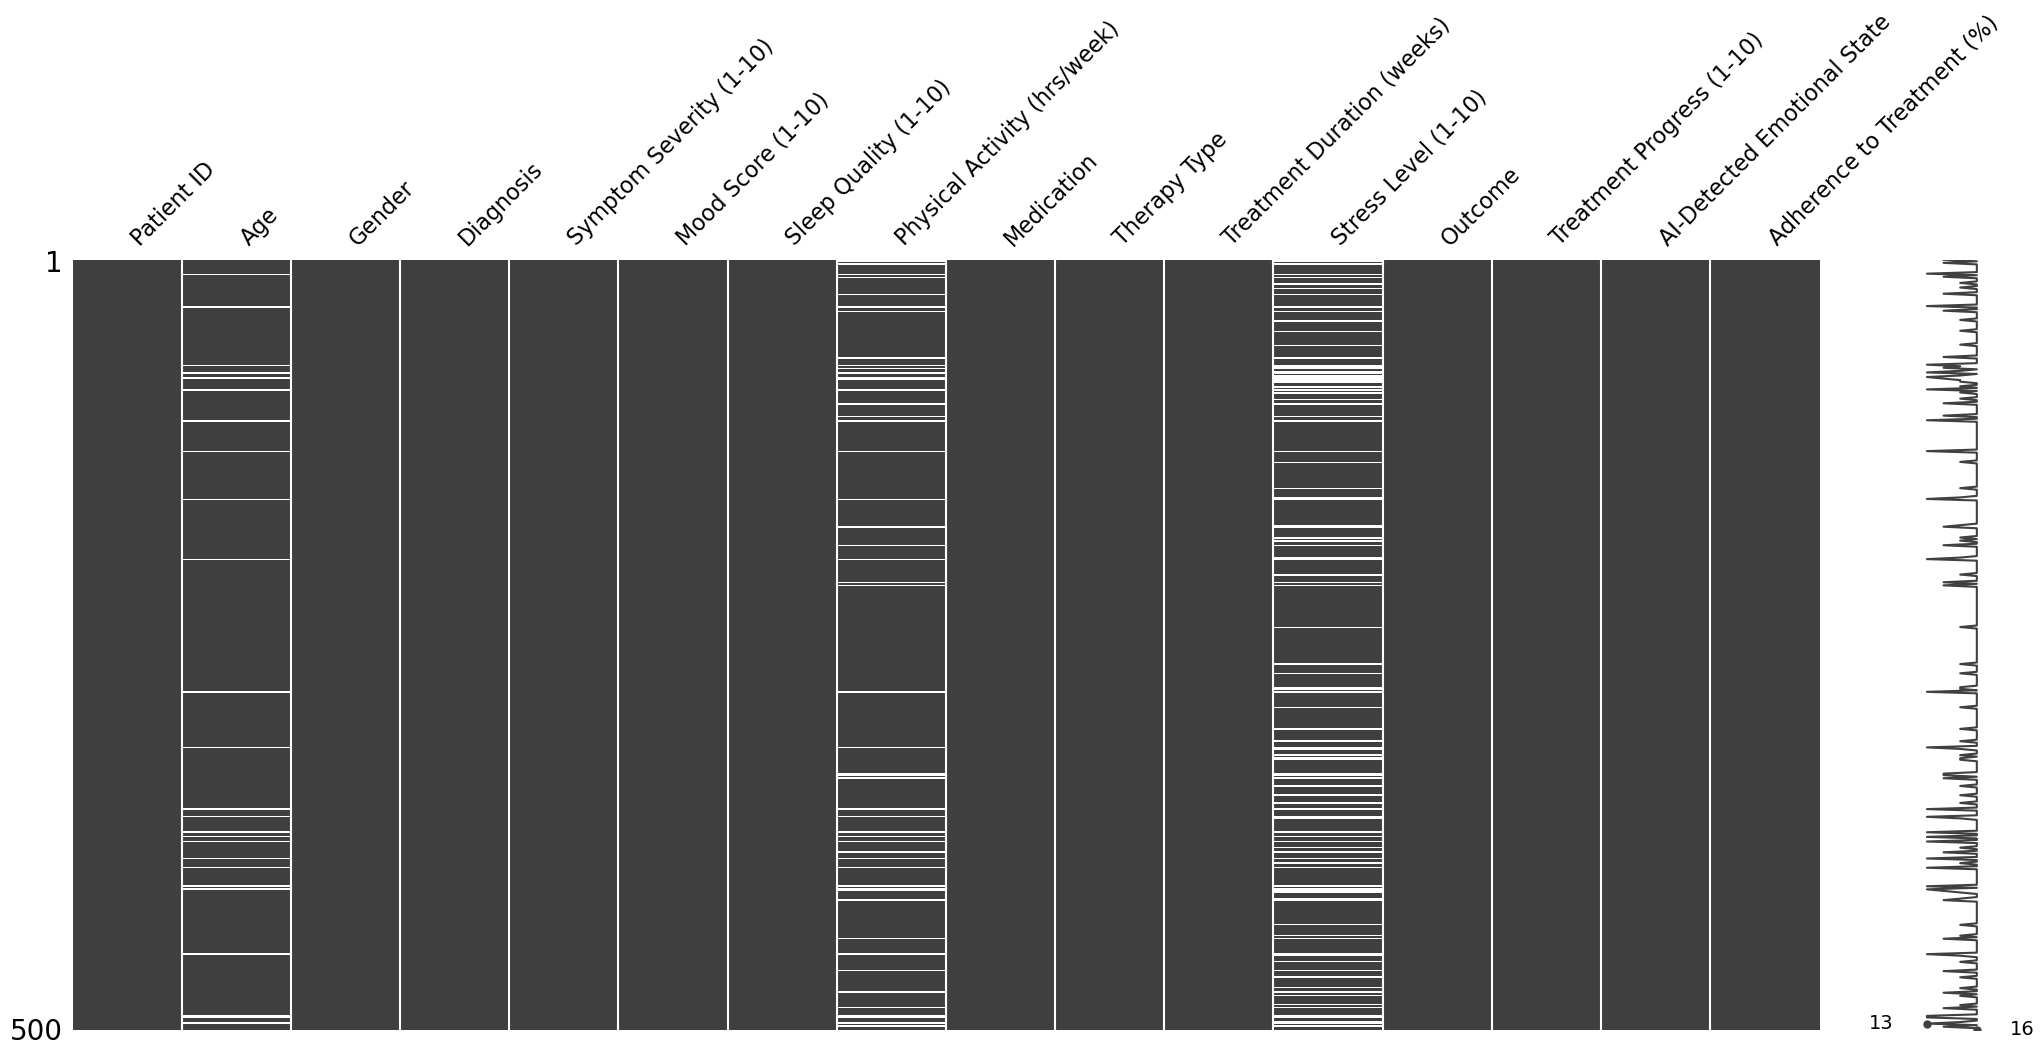

In [15]:
# Write your code here. Add as many boxes as you need.
msno.matrix(data)
plt.show()

Check if the dataset is balanced.

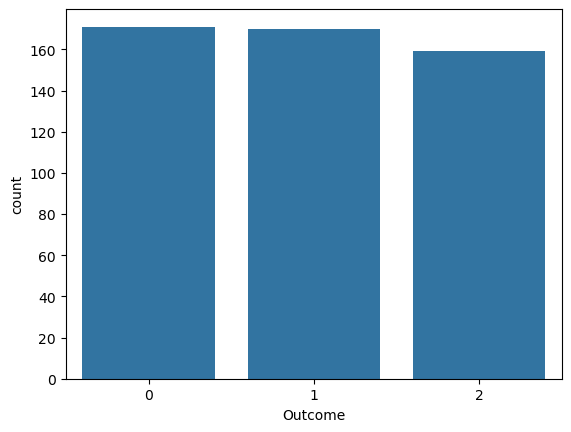

In [17]:
# Write your code here. Add as many boxes as you need.
sns.countplot(x='Outcome', data=data, order=data['Outcome'].value_counts().index)
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [19]:
# Write your code here. Add as many boxes as you need.
missing_percentage = data.isnull().mean() * 100
missing_percentage

Patient ID                       0.0
Age                              5.0
Gender                           0.0
Diagnosis                        0.0
Symptom Severity (1-10)          0.0
Mood Score (1-10)                0.0
Sleep Quality (1-10)             0.0
Physical Activity (hrs/week)    10.0
Medication                       0.0
Therapy Type                     0.0
Treatment Duration (weeks)       0.0
Stress Level (1-10)             20.0
Outcome                          0.0
Treatment Progress (1-10)        0.0
AI-Detected Emotional State      0.0
Adherence to Treatment (%)       0.0
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

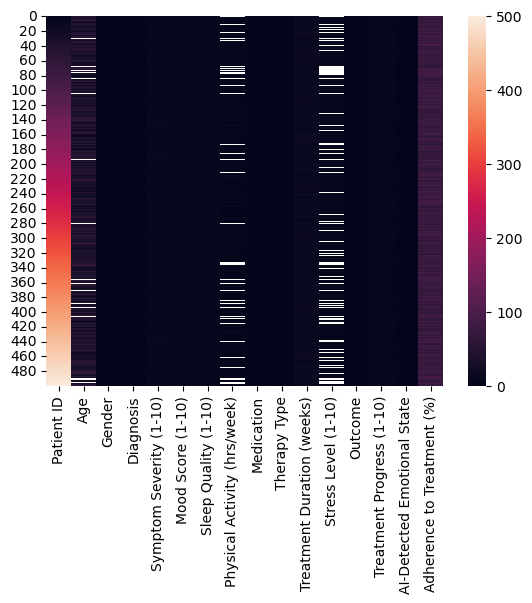

In [21]:
# Write your code here. Add as many boxes as you need.
sns.heatmap(data)
plt.show()

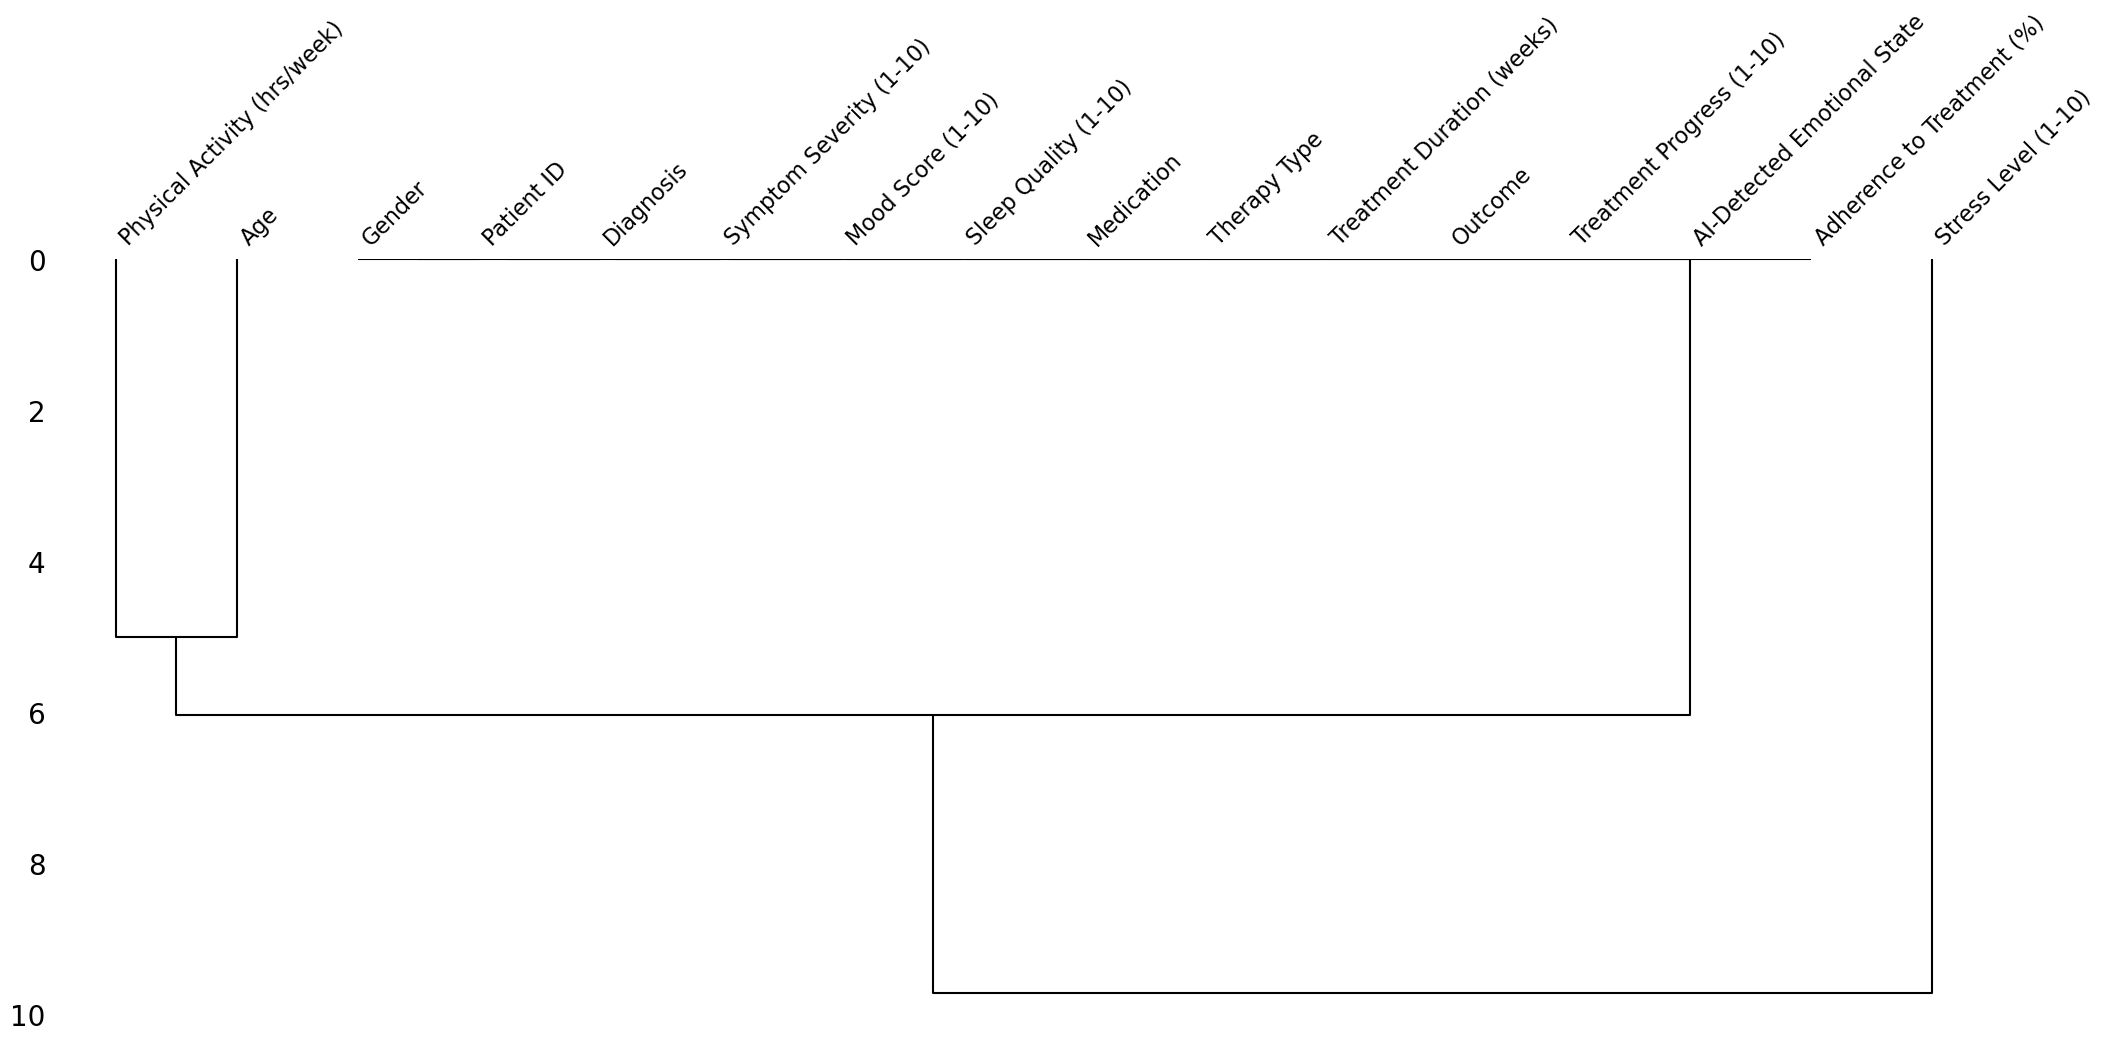

In [22]:
msno.dendrogram(data)
plt.show()

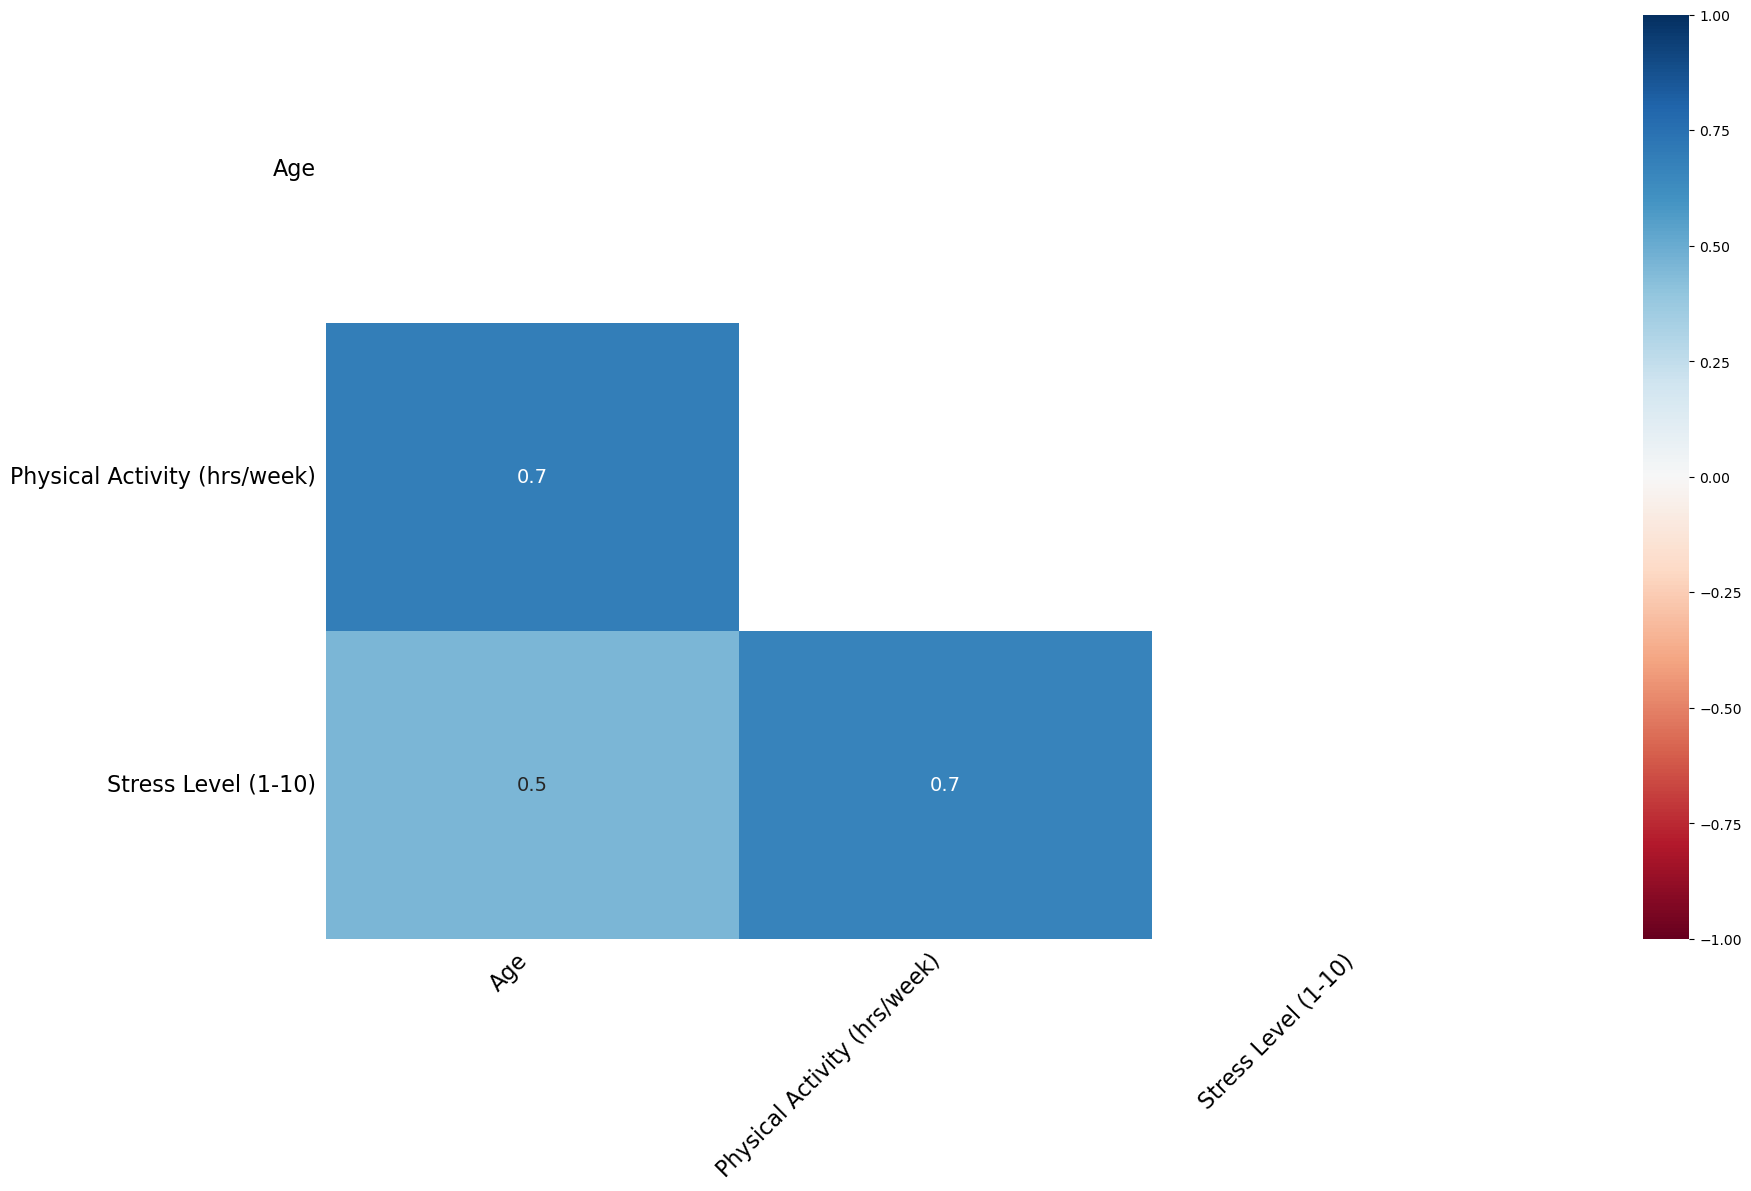

In [23]:
msno.heatmap(data)
plt.show()

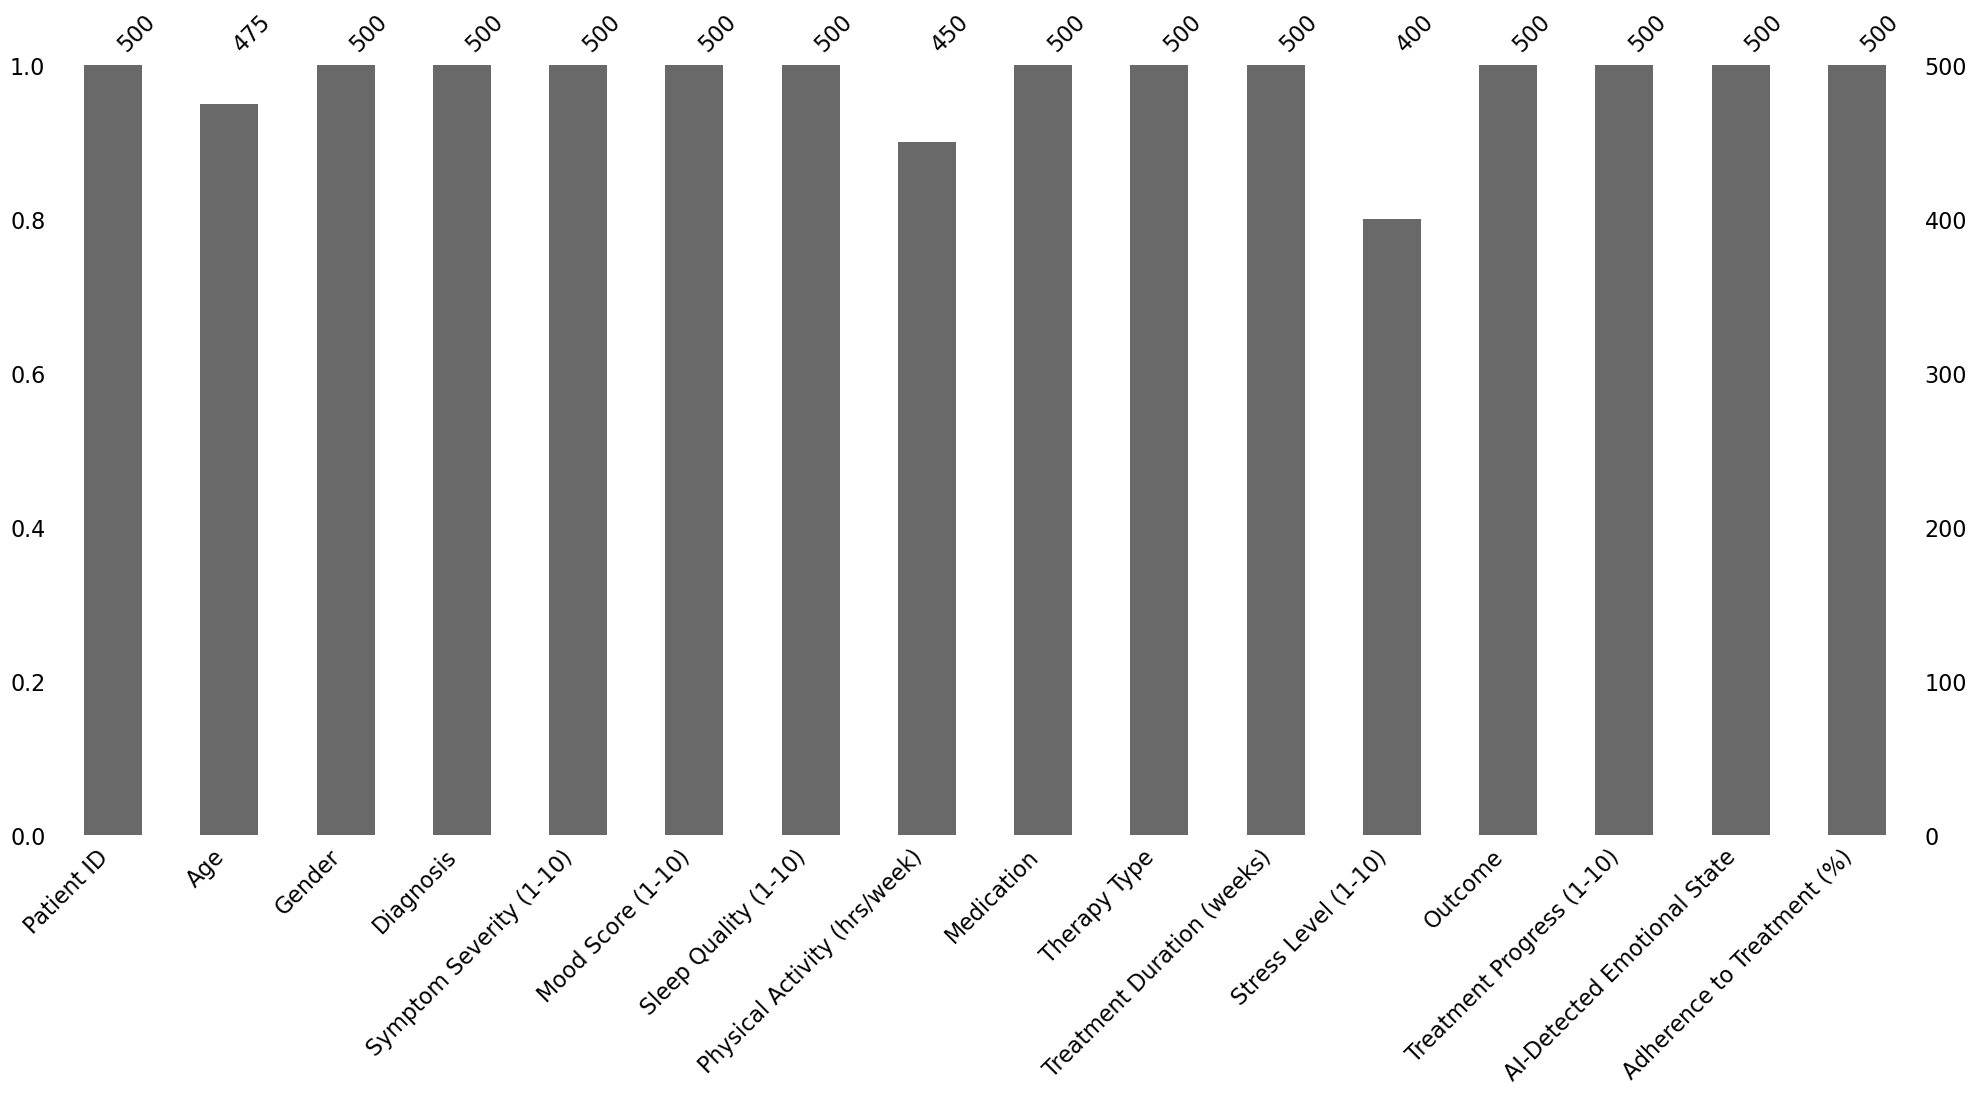

In [24]:
msno.bar(data)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [26]:
# Write your code here. Add as many boxes as you need.
impute_cols = ['Age','Physical Activity (hrs/week)','Stress Level (1-10)']
data[impute_cols] = data[impute_cols].apply(lambda col : col.fillna(col.mean()))
data.isnull().sum()

Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [28]:
# Write your code here. Add as many boxes as you need.
X = data.drop('Outcome',axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

## Feature Scaling
Standardize the features appropriately.

In [30]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [33]:
# Write your code here. Add as many boxes as you need.
model = RandomForestClassifier()
model.fit(X_scaled_train, y_train)

RandomForestClassifier()

Use the trained model to make predictions for the test set.

In [35]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(X_scaled_test)

Assess the performance of the model by using different classification metrics.

In [57]:
# Write your code here. Add as many boxes as you need.
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.34
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.46      0.45        37
           1       0.21      0.27      0.23        30
           2       0.39      0.27      0.32        33

    accuracy                           0.34       100
   macro avg       0.35      0.33      0.34       100
weighted avg       0.36      0.34      0.34       100



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [59]:
# Write your code here. Add as many boxes as you need.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle= False)

## Feature Scaling
Standardize the features appropriately.

In [61]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [65]:
# Write your code here. Add as many boxes as you need.
model = RandomForestClassifier(random_state=42)
param_grid= {
    'n_estimators': [100,200,300],
    'max_depth'   :[10,20,30],
    'min_samples_split':[2,5],
    'min_samples_leaf' :[1,2,4]
}
grid_search = GridSearchCV(estimator = model, param_grid=param_grid, cv=5, n_jobs = -1, verbose =2)
grid_search.fit(X_scaled_train, y_train)
print("Best Hyperparameters from Grid Search:", grid_search.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters from Grid Search: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [67]:
# Write your code here. Add as many boxes as you need.
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_scaled_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.42
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.77      0.59        22
           1       0.44      0.20      0.28        20
           2       0.00      0.00      0.00         8

    accuracy                           0.42        50
   macro avg       0.31      0.32      0.29        50
weighted avg       0.39      0.42      0.37        50

Confusion Matrix:
 [[17  3  2]
 [13  4  3]
 [ 6  2  0]]
